In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score

import pandas as pd
import matplotlib.pyplot as plt

### 데이터 분석 & 목적
- 데이터 구성 => 방법 ? 지도 / 비지도
    - 데이터 / 피쳐 / 특성 / 변수 / 속성 / 독립변수 / 관측값 ---- 타겟 / 라벨 / 클래스 / 종속변수 / 반응변수
- 데이터 목적 => 결과 / 타켓 / 종속변수 ---> 수치형 : 회귀, 범주형 : 분류
- 학습 방법 => 해당하는 학습 방법 => all_estimator()

#### [1] 데이터 준비
- 데이터 로딩 & 기본 데이터 확인

In [63]:
stdDF = pd.read_csv('student_info.csv', usecols=[2, 3])
stdDF.head(3)

,weight_kg,height_cm
0,98,198
1,77,170
2,70,170


In [64]:
stdDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   weight_kg  90 non-null     int64
 1   height_cm  90 non-null     int64
dtypes: int64(2)
memory usage: 1.5 KB


#### [2] 데이터 전처리
- 데이터 정제 : 결측치, 중복값, 이상치, 모순값
- 데이터 표준화 : 단위, 자료형
- 데이터 정규화 : 수치값 => 값의 범위 : 통일 --> 스케일러, 범주형 / 글자 => OrdinalEncoder, OneHotEncoder, LabelEncoder(y)
- 데이터 변형 : 특성 추가 / 생성

In [65]:
# missing data
stdDF.isnull().sum()

weight_kg    0
height_cm    0
dtype: int64

In [66]:
# bmi 특성 추가
bmi_value = round(stdDF.weight_kg / ((stdDF.height_cm / 100) ** 2), 1)

In [68]:
# -18.5  -23.0  -25.0  -30.0  - ==> L, N, O, B, H  => 0, 1, 2, 3, 4
# _bins = [0, 18.5, 23.0, 25.0, 30.0, max(bmi_value)]
_bins = [0, 18.5, 23.0, max(bmi_value)]

bmi_level = pd.cut(bmi_value, bins = _bins, labels = [0, 1, 2])

In [78]:
bmi_level.value_counts()

# 0:저체중 / 1:정상 / 2:과체중

2    54
1    28
0     8
dtype: int64

In [79]:
stdDF['bmi_level'] = bmi_level

In [80]:
stdDF.head(3)

,weight_kg,height_cm,bmi_level
0,98,198,2
1,77,170,2
2,70,170,2


In [81]:
# 특성 데이터의 범위 확인
stdDF.describe().T[['min', 'max']]

,min,max
weight_kg,43.0,110.0
height_cm,132.0,198.0


In [82]:
stdDF.describe().T['max'] - stdDF.describe().T['min']

weight_kg    67.0
height_cm    66.0
dtype: float64

In [83]:
# 수치형 특성 데이터 스케일링
st = StandardScaler()
st_data = st.fit_transform(stdDF[stdDF.columns[:-1]])

In [124]:
st_data.shape

(90, 2)

In [84]:
mmt = MinMaxScaler()
mmt_data = mmt.fit_transform(stdDF[stdDF.columns[:-1]])

In [126]:
mmt_data.shape

(90, 2)

In [85]:
# 데이터 -- 타겟 / 라벨 / 클래스 분리
data = stdDF[stdDF.columns[:-1]]
target = stdDF[stdDF.columns[-1]]

In [86]:
data.shape, target.shape

((90, 2), (90,))

#### [3] 학습용 데이터 준비 ==> 학습용, 테스트용, 검증용
- 분류 => 항목 비율
    * 데이터 추가
    * Upsampling(복원) / Downsampling(비복원)
    * API의 매개변수에 비율조정한 매개변수 체크
- 교차검증

In [87]:
# 타겟의 분휴 데이터의 비율이 고르지 않음 => 비율에 맞도록 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(data, target,
                                                    random_state = 11,
                                                    test_size = 0.2,
                                                    stratify = target)

In [88]:
len(X_train), len(y_train), len(X_test), len(y_test)

(72, 72, 18, 18)

#### [4] 학습 모델 객체 생성 및 학습 진행

In [92]:
# 분류 KNN 모델 객체 생성 ---- k = 5 기본값
knnModel = KNeighborsClassifier(n_neighbors=1)

In [95]:
scores = []
for n in range(1, X_train.shape[0]):
    knnModel.n_neighbors = n
    knnModel.fit(X_train, y_train)
    sc = knnModel.score(X_train, y_train)
    print(f'[{n}] : score : {sc}')
    scores.append(sc)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[1] : score : 1.0
[2] : score : 0.9305555555555556
[3] : score : 0.9027777777777778
[4] : score : 0.9027777777777778
[5] : score : 0.9166666666666666
[6] : score : 0.9166666666666666
[7] : score : 0.9305555555555556


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[8] : score : 0.9166666666666666
[9] : score : 0.9027777777777778
[10] : score : 0.8611111111111112
[11] : score : 0.9166666666666666
[12] : score : 0.8611111111111112
[13] : score : 0.8333333333333334
[14] : score : 0.8333333333333334
[15] : score : 0.8333333333333334
[16] : score : 0.8333333333333334


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[17] : score : 0.7916666666666666
[18] : score : 0.7777777777777778
[19] : score : 0.7777777777777778
[20] : score : 0.7777777777777778
[21] : score : 0.7777777777777778
[22] : score : 0.7777777777777778
[23] : score : 0.7777777777777778
[24] : score : 0.7777777777777778
[25] : score : 0.7638888888888888
[26] : score : 0.7777777777777778


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[27] : score : 0.75
[28] : score : 0.75
[29] : score : 0.75
[30] : score : 0.7638888888888888
[31] : score : 0.7638888888888888
[32] : score : 0.6944444444444444
[33] : score : 0.6944444444444444
[34] : score : 0.6944444444444444
[35] : score : 0.5972222222222222
[36] : score : 0.5972222222222222
[37] : score : 0.5972222222222222
[38] : score : 0.5972222222222222
[39] : score : 0.5972222222222222


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[40] : score : 0.5972222222222222
[41] : score : 0.5972222222222222
[42] : score : 0.5972222222222222
[43] : score : 0.5972222222222222
[44] : score : 0.5972222222222222
[45] : score : 0.5972222222222222
[46] : score : 0.5972222222222222
[47] : score : 0.5972222222222222
[48] : score : 0.5972222222222222
[49] : score : 0.5972222222222222
[50] : score : 0.5972222222222222
[51] : score : 0.5972222222222222
[52] : score : 0.5972222222222222
[53] : score : 0.5972222222222222
[54] : score : 0.5972222222222222
[55] : score : 0.5972222222222222
[56] : score : 0.5972222222222222
[57] : score : 0.5972222222222222
[58] : score : 0.5972222222222222
[59] : score : 0.5972222222222222
[60] : score : 0.5972222222222222
[61] : score : 0.5972222222222222
[62] : score : 0.5972222222222222
[63] : score : 0.5972222222222222
[64] : score : 0.5972222222222222
[65] : score : 0.5972222222222222


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[66] : score : 0.5972222222222222
[67] : score : 0.5972222222222222
[68] : score : 0.5972222222222222
[69] : score : 0.5972222222222222
[70] : score : 0.5972222222222222
[71] : score : 0.5972222222222222


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

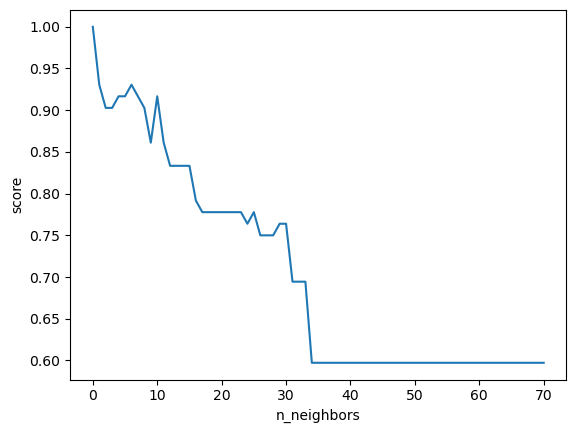

In [94]:
plt.plot(scores)
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

📌 분류의 범위를 줄여야 함!

📌 k = 2 또는 k = 7이 적당

In [105]:
# 결정된 n_neighbors = 2 or 7
knnModel.n_neighbors = 7
knnModel.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

#### [5] 예측 및 평가
- 검증 데이터 => 예측 & 평가
- 테스트 데이터 => 예측 & 평가

In [106]:
y_pre = knnModel.predict(X_test)

accuracy_score(y_test, y_pre)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8333333333333334

In [107]:
knnModel.score(X_test, y_test)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.8333333333333334

#### [6] 결과
- 성능 만족스럽지 않음 ==> 튜닝 (하이퍼파라미터)
- 성능 만족스러움 => 모델 저장

In [108]:
from sklearn.model_selection import GridSearchCV

In [116]:
# Hyperparameter => n_neighbors, p, weights
model = KNeighborsClassifier()
params = {'n_neighbors':[2, 3, 4, 5], 'p':[1, 2], 'weights':['uniform', 'distance']}

grid = GridSearchCV(model, param_grid=params, scoring='accuracy', cv=3)

In [117]:
grid.fit(X_train, y_train)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 3, 4, 5], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [118]:
grid.cv_results_

{'mean_fit_time': array([0.00851941, 0.00957044, 0.00710122, 0.0060885 , 0.00941412,
        0.00807714, 0.00791017, 0.00887307, 0.00966962, 0.00822528,
        0.00765872, 0.01244871, 0.01117818, 0.01238068, 0.00621279,
        0.00471441]),
 'std_fit_time': array([0.00156308, 0.0011309 , 0.00079406, 0.00156767, 0.00057161,
        0.00109692, 0.00164479, 0.00078035, 0.00224497, 0.00089842,
        0.00162512, 0.00462503, 0.00428938, 0.00268549, 0.00092005,
        0.00058922]),
 'mean_score_time': array([0.01115743, 0.0081195 , 0.00990582, 0.00934243, 0.01341343,
        0.00908264, 0.01283153, 0.00819214, 0.01232155, 0.00937668,
        0.01162489, 0.01216229, 0.01774128, 0.01083342, 0.01115735,
        0.00956647]),
 'std_score_time': array([0.00177959, 0.00125689, 0.0004822 , 0.00060721, 0.0008744 ,
        0.00074116, 0.00059379, 0.00034339, 0.00136802, 0.00367806,
        0.00099006, 0.00200794, 0.00396537, 0.00095918, 0.00101013,
        0.00121093]),
 'param_n_neighbors': mask

In [121]:
grid.best_params_, grid.best_score_

({'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}, 0.8888888888888888)

In [123]:
model = grid.best_estimator_